# Import and inspect data

In [78]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize, FreqDist
import string
pd.set_option('display.max_rows', 500)

In [79]:
df = pd.read_csv('../data/complaints.csv')

/home/ski/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [70]:
df.shape

(2671673, 18)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671673 entries, 0 to 2671672
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 366.

### Percentage missing values

In [39]:
(df.isnull().sum()/df.shape[0])*100

Date received                    0.000000
Product                          0.000000
Sub-product                      8.802088
Issue                            0.000000
Sub-issue                       24.697072
Consumer complaint narrative    65.011100
Company public response         58.329631
Company                          0.000000
State                            1.486859
ZIP code                         1.496403
Tags                            88.285954
Consumer consent provided?      29.181041
Submitted via                    0.000000
Date sent to company             0.000000
Company response to consumer     0.000112
Timely response?                 0.000000
Consumer disputed?              71.236824
Complaint ID                     0.000000
dtype: float64

How many are missing complaint narratives?

In [40]:
missing_complaints = df["Consumer complaint narrative"][df["Consumer complaint narrative"].isna()].shape[0]
print(f"There are {missing_complaints:,} datapoints missing a consumer complaint narrative.")

There are 1,736,884 datapoints missing a consumer complaint narrative.


How many unique products are there for each issue?

In [71]:
df.groupby(["Issue","Product"])[["Product"]].count()

Product
Issue                                              Product                                                    
APR or interest rate                               Credit card                                            5506
Account opening, closing, or management            Bank account or service                               37961
Account terms and changes                          Consumer Loan                                           484
Adding money                                       Prepaid card                                            202
Advertising                                        Credit card or prepaid card                             284
Advertising and marketing                          Credit card                                            2926
                                                   Other financial service                                  33
Advertising and marketing, including promotiona... Credit card or prepaid card                            7106
Advertising, marketing or disclosures              Prepaid card                                             77
Application processing delay                       Credit card                                             540
Application, originator, mortgage broker           Mortgage                                              17229
Applied for loan/did not receive money             Consumer Loan                                            38
                                                   Payday loan                                             307
Applying for a mortgage or refinancing an exist... Mortgage                                              17291
Arbitration                                        Credit card                                             349
Attempts to collect debt not owed                  Debt collection                                      137630
Balance transfer                                   Credit card                                            1117
Balance transfer fee                               Credit card                                             221
Bankruptcy                                         Credit card                                             448
Billing disputes                                   Credit card                                           15136
Billing statement                                  Credit card                                            2619
Can't contact lender                               Consumer Loan                                            90
                                                   Payday loan                                            1016
Can't contact lender or servicer                   Payday loan, title loan, or personal loan               609
Can't repay my loan                                Student loan                                           8726
Can't stop charges to bank account                 Consumer Loan                                            12
                                                   Payday loan                                             498
Can't stop withdrawals from your bank account      Payday loan, title loan, or personal loan               361
Cash advance                                       Credit card                                             245
Cash advance fee                                   Credit card                                             196
Charged bank acct wrong day or amt                 Consumer Loan                                            10
                                                   Payday loan                                             287
Charged fees or interest I didn't expect           Consumer Loan                                           292
                                                   Payday loan                                            2461
Charged fees or interest you didn't expect         Payday loan, title loan, or personal loan              5

In [72]:
df.groupby(["Product","Issue"])[["Issue"]].count()

Issue
Product                                            Issue                                                     
Bank account or service                            Account opening, closing, or management              37961
                                                   Deposits and withdrawals                             22851
                                                   Making/receiving payments, sending money              7404
                                                   Problems caused by my funds being low                11845
                                                   Using a debit or ATM card                             6145
Checking or savings account                        Closing an account                                   15288
                                                   Credit monitoring or identity theft protection ...      34
                                                   Getting a line of credit                                 2
                                                   Improper use of your report                            121
                                                   Incorrect information on your report                   528
                                                   Managing an account                                  76825
                                                   Opening an account                                   11792
                                                   Problem caused by your funds being low                7271
                                                   Problem with a credit reporting company's inves...      77
                                                   Problem with a lender or other company charging...   10383
                                                   Problem with credit report or credit score               2
                                                   Problem with fraud alerts or security freezes           54
                                                   Unable to get your credit report or credit score        19
Consumer Loan                                      Account terms and changes                              484
                                                   Applied for loan/did not receive money                  38
                                                   Can't contact lender                                    90
                                                   Can't stop charges to bank account                      12
                                                   Charged bank acct wrong day or amt                      10
                                                   Charged fees or interest I didn't expect               292
                                                   Lender damaged or destroyed property                     3
                                                   Lender damaged or destroyed vehicle                      8
                                                   Lender repossessed or sold the vehicle                  79
                                                   Lender sold the property                                 7
                                                   Managing the line of credit                            806
                                                   Managing the loan or lease                           15280
                                                   Payment to acct not credited                            79
                                                   Problems when you are unable to pay                   7688
                                                   Received a loan I didn't apply for                      23
                                                   Shopping for a line of credit                          302
                                                   Shopping for a loan or lease                          2029
                                  

### Remove datapoints that are missing the consumer complaint narrative

In [31]:
df_removed = df[~df["Consumer complaint narrative"].isna()]

Company public response unique values

In [61]:
df["Company public response"][df["Company public response"].notna()].unique()

array(['Company has responded to the consumer and the CFPB and chooses not to provide a public response',
       'Company believes it acted appropriately as authorized by contract or law',
       'Company believes complaint caused principally by actions of third party outside the control or direction of the company',
       "Company can't verify or dispute the facts in the complaint",
       'Company believes the complaint is the result of a misunderstanding',
       'Company believes complaint represents an opportunity for improvement to better serve consumers',
       "Company believes the complaint provided an opportunity to answer consumer's questions",
       'Company disputes the facts presented in the complaint',
       'Company believes complaint is the result of an isolated error',
       'Company believes complaint relates to a discontinued policy or procedure',
       'Company chooses not to provide a public response'], dtype=object)

Company response to consumer unique values

In [63]:
df["Company response to consumer"][df["Company response to consumer"].notna()].unique()

array(['In progress', 'Closed with non-monetary relief',
       'Closed with explanation', 'Closed with monetary relief',
       'Untimely response', 'Closed without relief', 'Closed',
       'Closed with relief'], dtype=object)

### Isolate relevant columns & rows

The year 2020 and only datapoints that include a narrative

In [80]:
# Use same year as comparison
df = df[df["Date received"].str.contains("2020")]
df.shape

(444348, 18)

In [81]:
df = df[df["Consumer complaint narrative"].notna()]
df.shape

(174359, 18)

In [82]:
df = df.rename(
    columns={
        "Product": "label",
        "Consumer complaint narrative": "narrative",
        "Issue": "issue",
        "Sub-issue": "sub_issue",
        "Company": "company",
        "Company public response": "company_response",
        "Tags": "tags",
        "State": "state",
        "Complaint ID": "id",
    }
)



In [83]:
df.head()

,Date received,label,Sub-product,issue,sub_issue,narrative,company_response,company,state,ZIP code,tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,id
14371,2020-12-28,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Investigation took more than 30 days,XX/XX/2020 {$500.00} attempting to remove inac...,Company can't verify or dispute the facts in t...,AmeriCollect,WI,53222.0,NaN,Consent provided,Web,2020-12-28,Closed with explanation,Yes,NaN,4034562
14733,2020-12-07,Debt collection,Federal student loan debt,Written notification about debt,Notification didn't disclose it was an attempt...,i have contact this agency via a dispute i dit...,Company has responded to the consumer and the ...,"Ability Recovery Services, LLC",PA,18201.0,NaN,Consent provided,Web,2020-12-07,Closed with explanation,Yes,NaN,3995605
109066,2020-03-17,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,Its been several months now I have been in con...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AR,71923.0,NaN,Consent provided,Web,2020-03-17,Closed with explanation,Yes,NaN,3569087
109451,2020-03-07,Mortgage,Conventional home mortgage,Trouble during payment process,NaN,Subject : Discrepancies to Escrow Account Stat...,Company disputes the facts presented in the co...,"Shellpoint Partners, LLC",NJ,7621.0,"Older American, Servicemember",Consent provided,Web,2020-03-07,Closed with explanation,Yes,NaN,3557682
109477,2020-01-14,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,Cash Central responded to my complaint that th...,NaN,"COMMUNITY CHOICE FINANCIAL, INC.",TX,75056.0,NaN,Consent provided,Web,2020-01-14,Closed with explanation,Yes,NaN,3495385


In [84]:
df['label'].value_counts()

Credit reporting, credit repair services, or other personal consumer reports    95934
Debt collection                                                                 25866
Credit card or prepaid card                                                     17102
Mortgage                                                                        12471
Checking or savings account                                                      9530
Money transfer, virtual currency, or money service                               4828
Vehicle loan or lease                                                            3806
Student loan                                                                     2466
Payday loan, title loan, or personal loan                                        2356
Name: label, dtype: int64

In [10]:
df['issue'].value_counts()

Incorrect information on your report                                                58192
Problem with a credit reporting company's investigation into an existing problem    30278
Attempts to collect debt not owed                                                   12425
Trouble during payment process                                                       5865
Improper use of your report                                                          5663
Managing an account                                                                  5396
Written notification about debt                                                      5129
Problem with a purchase shown on your statement                                      4429
False statements or representation                                                   2946
Took or threatened to take negative or legal action                                  2605
Struggling to pay mortgage                                                           2303
Applying f

In [12]:
df['sub_issue'].value_counts()

Information belongs to someone else                                                      35800
Their investigation did not fix an error on your report                                  15508
Account status incorrect                                                                  8486
Account information incorrect                                                             7391
Debt is not yours                                                                         6072
Was not notified of investigation status or results                                       5977
Investigation took more than 30 days                                                      5556
Credit inquiries on your report that you don't recognize                                  4067
Didn't receive enough information to verify debt                                          3297
Debt was result of identity theft                                                         3189
Credit card company isn't resolving a dispute abou

The label (aka PRODUCT) is the outcome variable.

### Check out class imbalance: Before

In [56]:
import seaborn as sns

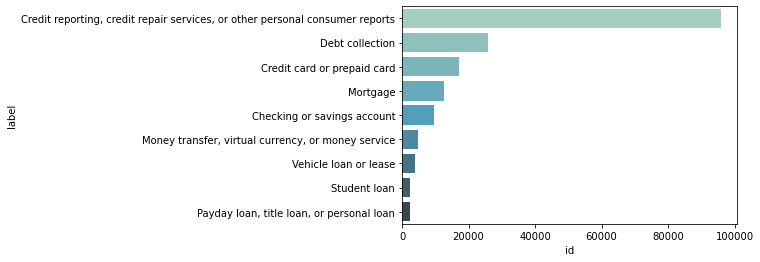

In [64]:
data = df.groupby("label")[["id"]].count().sort_values(by="id", ascending=False).reset_index()
g = sns.barplot(x="id", y="label", data=data,  palette="GnBu_d")

### Check out class imbalance: After

In [103]:
df["label_new"] = df["label"].replace(
    {
        "Credit reporting, credit repair services, or other personal consumer reports": "credit_reporting",
        "Debt collection": "debt_collection",
        "Credit reporting": "credit_reporting",
        "Credit card or prepaid card": "credit_card",
        "Prepaid card": "credit_card",
        "Credit card": "credit_card",
        "Mortgage": "mortgages_and_loans",
        "Checking or savings account": "retail_banking",
        "Money transfer, virtual currency, or money service": "retail_banking",
        "Money transfers": "retail_banking",
        "Virtual currency": "retail_banking",
        "Bank account or service": "retail_banking",
        "Vehicle loan or lease": "mortgages_and_loans",
        "Payday loan, title loan, or personal loan": "mortgages_and_loans",
        "Consumer Loan": "mortgages_and_loans",
        "Payday loan": "mortgages_and_loans",
        "Student loan": "mortgages_and_loans",
    },
)

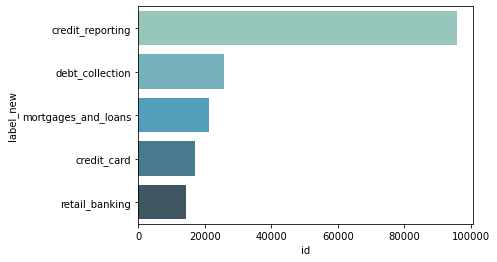

In [67]:
data = df.groupby("label_new")[["id"]].count().sort_values(by="id", ascending=False).reset_index()
g = sns.barplot(x="id", y="label_new", data=data,  palette="GnBu_d")

### Check out sequence length of combined strings

In [86]:
# df = df.reset_index(drop=True)
# df = df[
#     [
#         "label",
#         "narrative",
#         "issue",
#         "sub_issue",
#         "company",
#         "company_response",
#         "tags",
#     ]
# ]

# df = df.rename(
#     columns={
#         "Product": "label",
#         "Consumer complaint narrative": "narrative",
#         "Issue": "issue",
#         "Sub-issue": "sub_issue",
#         "Company": "company",
#         "Company public response": "company_response",
#         "Tags": "tags",
#         "State": "state",
#         "Complaint ID": "id",
#     }
# )
# Combine into one sequence column
sequence_cols = [
    "narrative",
    "issue",
    "sub_issue",
    "company",
    "company_response",
    "tags",
]
df.loc[:, sequence_cols] = df[sequence_cols].fillna("")
df.loc[:, "sequence"] = (
    df["narrative"]
    + " "
    + df["issue"]
    + " "
    + df["sub_issue"]
    + " "
    + df["company"]
    + " "
    + df["company_response"]
    + " "
    + df["tags"]
)
data = df[["id", "label", "sequence", "state"]].astype("str")

In [105]:
data["len_sequence"] = data["sequence"].apply(lambda val: val.split()).apply(len)

data["label_new"] = data["label"].replace(
    {
        "Credit reporting, credit repair services, or other personal consumer reports": "credit_reporting",
        "Debt collection": "debt_collection",
        "Credit reporting": "credit_reporting",
        "Credit card or prepaid card": "credit_card",
        "Prepaid card": "credit_card",
        "Credit card": "credit_card",
        "Mortgage": "mortgages_and_loans",
        "Checking or savings account": "retail_banking",
        "Money transfer, virtual currency, or money service": "retail_banking",
        "Money transfers": "retail_banking",
        "Virtual currency": "retail_banking",
        "Bank account or service": "retail_banking",
        "Vehicle loan or lease": "mortgages_and_loans",
        "Payday loan, title loan, or personal loan": "mortgages_and_loans",
        "Consumer Loan": "mortgages_and_loans",
        "Payday loan": "mortgages_and_loans",
        "Student loan": "mortgages_and_loans",
    },
)

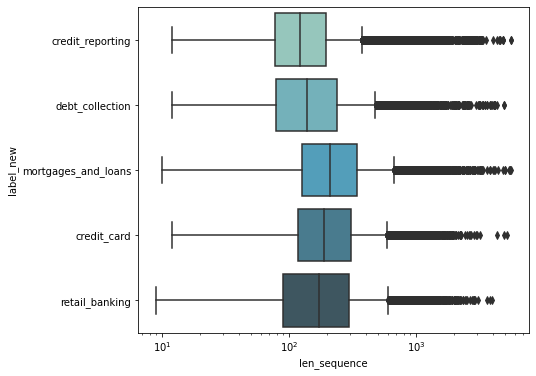

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale("log")

sns.boxplot(y=data["label_new"], x=data["len_sequence"],  palette="GnBu_d");
plt.show()

# Prepare Text

## Inspect first row

In [13]:
print(df.iloc[0])
text = df['narrative'][0]
text

id                                                            4034562
label               Credit reporting, credit repair services, or o...
narrative           XX/XX/2020 {$500.00} attempting to remove inac...
issue               Problem with a credit reporting company's inve...
sub_issue                        Investigation took more than 30 days
company                                                  AmeriCollect
company_response    Company can't verify or dispute the facts in t...
tags                                                              NaN
state                                                              WI
Name: 0, dtype: object


'XX/XX/2020 {$500.00} attempting to remove inaccurate information'